In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
column_names = ["Category", "Description"] 

data = pd.read_csv('/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv',header=None, names=column_names)
data

,Category,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [3]:
value_counts = data['Category'].value_counts()
print(value_counts)

Category
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64


In [99]:
df = data.sample(1000)

In [100]:
df['Category'].value_counts()

Category
Household                 378
Books                     238
Electronics               212
Clothing & Accessories    172
Name: count, dtype: int64

<BarContainer object of 4 artists>

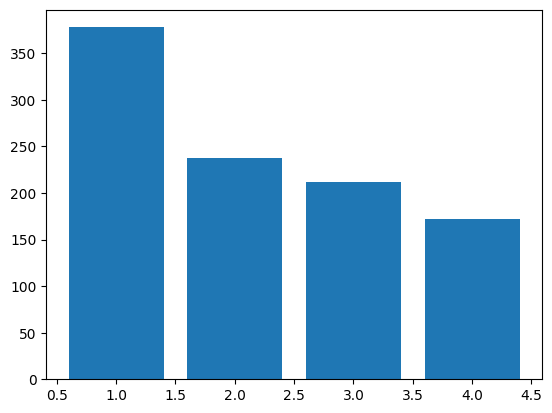

In [101]:
x = [1, 2, 3, 4]
plt.bar(x, df['Category'].value_counts())

In [102]:
sen = df['Description'].tolist()

In [103]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')


def get_word_embeddings(text):
    encoded_input = tokenizer(text, return_tensors="tf", padding="max_length", truncation=True)
    output = model(encoded_input)[0]
    word_embeddings = output[:, 1:-1, :] 
    return word_embeddings.numpy()


word_embeddings_list = []
i = 0
for s in sen:
    print(i, end=' ')
    word_embeddings = get_word_embeddings(s)
    word_embeddings_list.append(word_embeddings)
    i+=1

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [104]:
print(len(word_embeddings_list))

1000


In [105]:
print(len(word_embeddings_list[0]))
word_embeddings_list[0]

1


array([[[ 0.58906204,  0.21334124,  0.6138725 , ...,  0.00694529,
          0.4189116 ,  0.2801922 ],
        [ 0.472211  , -0.4872566 ,  1.3364265 , ...,  0.20420438,
          0.9107893 ,  0.02514459],
        [ 0.19228558, -0.22745396,  1.4665908 , ...,  0.24936792,
          0.50617886,  0.46979362],
        ...,
        [ 0.19688244,  0.32985067,  0.59333235, ..., -0.01181022,
          0.04665855, -0.20676965],
        [ 0.12101229,  0.15605669,  0.6262324 , ...,  0.04576373,
         -0.03946072, -0.20139211],
        [-0.1098429 , -0.44574004,  0.3500648 , ...,  0.29770532,
          0.3447964 , -0.25334048]]], dtype=float32)

In [106]:
print(len(word_embeddings_list[7][0]))
word_embeddings_list[0][0]

510


array([[ 0.58906204,  0.21334124,  0.6138725 , ...,  0.00694529,
         0.4189116 ,  0.2801922 ],
       [ 0.472211  , -0.4872566 ,  1.3364265 , ...,  0.20420438,
         0.9107893 ,  0.02514459],
       [ 0.19228558, -0.22745396,  1.4665908 , ...,  0.24936792,
         0.50617886,  0.46979362],
       ...,
       [ 0.19688244,  0.32985067,  0.59333235, ..., -0.01181022,
         0.04665855, -0.20676965],
       [ 0.12101229,  0.15605669,  0.6262324 , ...,  0.04576373,
        -0.03946072, -0.20139211],
       [-0.1098429 , -0.44574004,  0.3500648 , ...,  0.29770532,
         0.3447964 , -0.25334048]], dtype=float32)

In [107]:
print(len(word_embeddings_list[0][0][0]))
word_embeddings_list[0][0][0]

768


array([ 5.89062035e-01,  2.13341236e-01,  6.13872528e-01, -2.46125430e-01,
        4.67912018e-01, -3.06094773e-02, -5.81193805e-01,  9.73072946e-02,
        7.45169878e-01, -1.10867059e+00, -8.90208855e-02,  1.10112764e-01,
        2.23088562e-01,  9.31202620e-02,  1.88915148e-01, -3.37664157e-01,
        2.09308907e-01, -1.22821771e-01, -3.41629416e-01, -2.74145842e-01,
        3.14637482e-01,  9.74258244e-01,  1.09718010e-01,  3.09239775e-01,
       -2.55807310e-01, -1.50885209e-01, -1.53256834e-01, -4.71732169e-01,
       -1.53463602e-01, -1.09808695e+00,  4.41429555e-01, -5.46337605e-01,
        6.19488597e-01, -3.23976576e-01,  4.85084876e-02, -3.65354091e-01,
       -5.37158549e-01,  2.88090646e-01, -8.84765089e-01, -2.08143033e-02,
        2.56811529e-01, -6.06966197e-01,  2.43655786e-01,  4.81301814e-01,
       -1.53234303e-01, -7.91712463e-01, -2.43559897e-01,  4.32838738e-01,
        9.51701626e-02, -3.98041010e-01, -6.01254225e-01,  4.85113859e-01,
        8.94228816e-02,  

In [108]:
len(word_embeddings_list), len(word_embeddings_list[0]), len(word_embeddings_list[0][0]), len(word_embeddings_list[0][0][0])

(1000, 1, 510, 768)

In [109]:
word_embeddings_list[0].shape

(1, 510, 768)

In [110]:
for i in word_embeddings_list:
    i = i*255

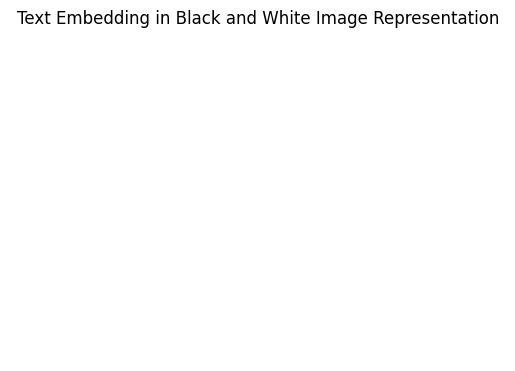

In [111]:
import matplotlib.pyplot as plt

# Extract the first 2D sub-matrix
first_2d_sub_matrix = word_embeddings_list[33][0]

# Convert grayscale values to black and white
bw_image = np.array(first_2d_sub_matrix) >= 127.5

# Display the black and white image using matplotlib
plt.imshow(bw_image, cmap='binary')
plt.title('Text Embedding in Black and White Image Representation')
plt.axis('off')  # Turn off axis
plt.show()

In [112]:
df

,Category,Description
22236,Books,Cambridge IELTS 12 Academic Student's Book wit...
24299,Books,"Science in the Soul Review ""[Dawkins] is a thu..."
17095,Household,Hobknobs White Ceramic Rose Flower Antique Bra...
12841,Household,Oster Ckstbrtw20 2-Pound Expressbake Breadmake...
33193,Clothing & Accessories,Mothercare Baby Girls' Sleepsuit (Pack of 3) Y...
...,...,...
32342,Clothing & Accessories,Elk Kids Boys Frenchie Panty Brief Innerwear 6...
25220,Books,Pitino: My Story About the Author Rick Pitino ...
42140,Electronics,India Meets India Aum Cum Steel Tongue Happy D...
25116,Books,Science and Technology: For Civil Services Pre...


In [113]:
df['category_numerical'] = pd.factorize(df['Category'])[0] + 1
df

,Category,Description,category_numerical
22236,Books,Cambridge IELTS 12 Academic Student's Book wit...,1
24299,Books,"Science in the Soul Review ""[Dawkins] is a thu...",1
17095,Household,Hobknobs White Ceramic Rose Flower Antique Bra...,2
12841,Household,Oster Ckstbrtw20 2-Pound Expressbake Breadmake...,2
33193,Clothing & Accessories,Mothercare Baby Girls' Sleepsuit (Pack of 3) Y...,3
...,...,...,...
32342,Clothing & Accessories,Elk Kids Boys Frenchie Panty Brief Innerwear 6...,3
25220,Books,Pitino: My Story About the Author Rick Pitino ...,1
42140,Electronics,India Meets India Aum Cum Steel Tongue Happy D...,4
25116,Books,Science and Technology: For Civil Services Pre...,1


In [114]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

y = df['category_numerical'].tolist()

X_train, X_test, y_train, y_test = train_test_split(word_embeddings_list, y, test_size=0.2, random_state=42)

# Convert word embeddings list and target labels to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [115]:
word_embeddings_list[0].shape

(1, 510, 768)

In [116]:
X_train.shape

(800, 1, 510, 768)

# Model Training

### 128 Filters, 3 kernels, 1 Stride, Max Pool Size = 2

In [117]:
X_train = np.squeeze(X_train, axis=1)  # Remove the unnecessary dimension
X_train = np.transpose(X_train, (0, 2, 1)) 

In [118]:
# Reshape the input data
 # Transpose to match Conv1D layer expectation

# Define the CNN model
model1 = models.Sequential([
    layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(768, 510)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # Assuming you have 10 classes for classification
])

model1.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 766, 128)       │       195,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 383, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 49024)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │     3,137,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,333,828 (12.72 MB)

 Trainable params: 3,333,828 (12.72 MB)

 Non-trainable params: 0 (0.00 B)

In [119]:



# Compile the model
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history1 = model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.2045 - loss: nan - val_accuracy: 0.1813 - val_loss: nan
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1810 - loss: nan - val_accuracy: 0.1813 - val_loss: nan
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1652 - loss: nan - val_accuracy: 0.1813 - val_loss: nan
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1765 - loss: nan - val_accuracy: 0.1813 - val_loss: nan
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1635 - loss: nan - val_accuracy: 0.1813 - val_loss: nan
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1575 - loss: nan - val_accuracy: 0.1813 - val_loss: nan
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1602 - loss: nan - val_accuracy: 0.1813 - val_loss: nan
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1765 - loss: nan - val_accuracy: 0.1813 - val_loss: nan
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━

In [120]:
X_test= np.squeeze(X_test, axis=1)  # Remove the unnecessary dimension
X_test = np.transpose(X_test, (0, 2, 1))

In [121]:
test_loss, test_acc = model1.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.1677 - loss: nan
Test accuracy: 0.1700


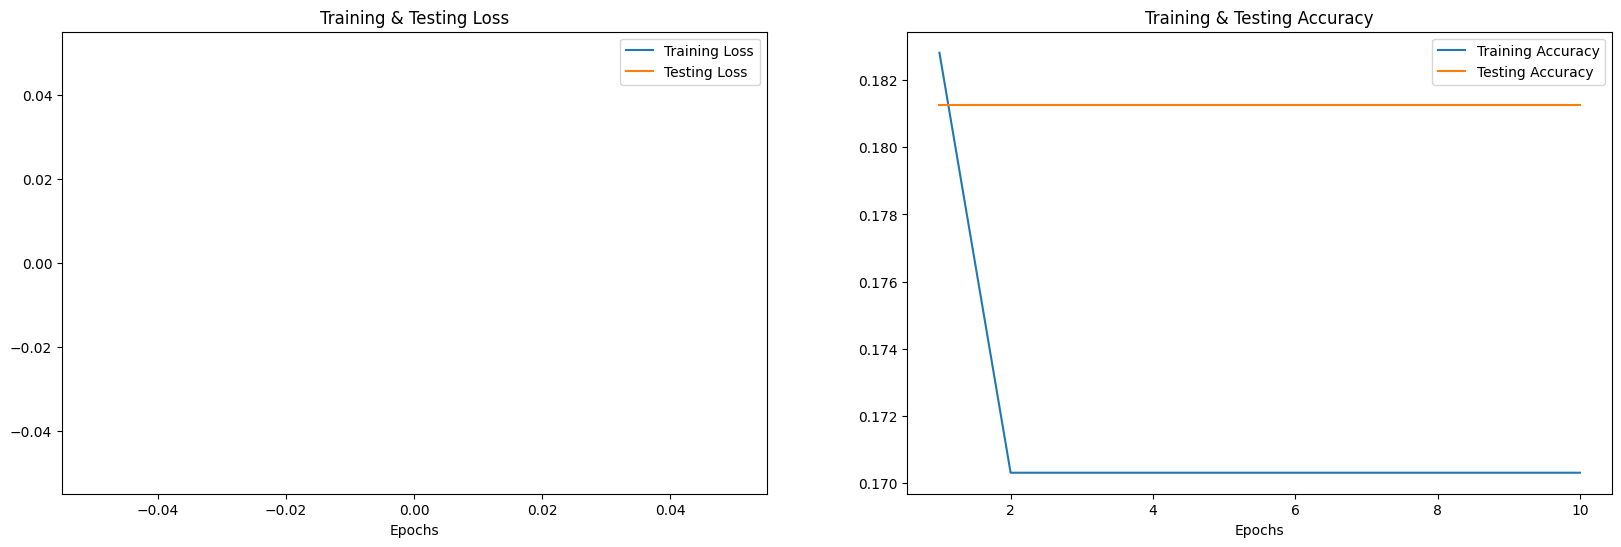

In [122]:
epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history1.history['accuracy']
train_loss = history1.history['loss']
test_acc = history1.history['val_accuracy']
test_loss = history1.history['val_loss']
epoch = []
for i in range(10):
    epoch.append(i+1)

fig.set_size_inches(20,6)
ax[0].plot(epoch , train_loss , label = 'Training Loss')
ax[0].plot(epoch , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epoch , train_acc , label = 'Training Accuracy')
ax[1].plot(epoch , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


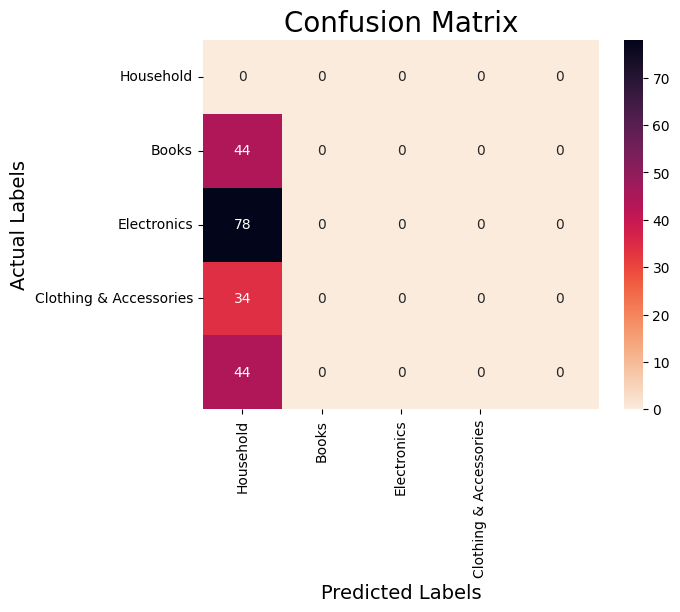

In [123]:
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns 

y_pred = model1.predict(X_test)
matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Household', 'Books', 'Electronics', 'Clothing & Accessories'], yticklabels = ['Household', 'Books', 'Electronics', 'Clothing & Accessories'])
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [124]:
print(classification_report(y_test, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      44.0
           2       0.00      0.00      0.00      78.0
           3       0.00      0.00      0.00      34.0
           4       0.00      0.00      0.00      44.0

    accuracy                           0.00     200.0
   macro avg       0.00      0.00      0.00     200.0
weighted avg       0.00      0.00      0.00     200.0



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

### Filters = 256, Kernal Size = 4, Strides = 2, Pool Size = 3

In [125]:
model2 = models.Sequential([
    layers.Conv1D(filters=256, kernel_size=4, strides=2, activation='relu', input_shape=(768, 510)),
    layers.MaxPooling1D(pool_size=3),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # Assuming you have 10 classes for classification
])

model2.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)              │ (None, 383, 256)       │       522,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 127, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 32512)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │     2,080,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,603,588 (9.93 MB)

 Trainable params: 2,603,588 (9.93 MB)

 Non-trainable params: 0 (0.00 B)

In [126]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 491ms/step - accuracy: 0.1924 - loss: nan - val_accuracy: 0.1813 - val_loss: nan
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.1720 - loss: nan - val_accuracy: 0.1813 - val_loss: nan
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.1668 - loss: nan - val_accuracy: 0.1813 - val_loss: nan
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.1693 - loss: nan - val_accuracy: 0.1813 - val_loss: nan
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.1808 - loss: nan - val_accuracy: 0.1813 - val_loss: nan
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.1694 - loss: nan - val_accuracy: 0.1813 - val_loss: nan
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.1732 - loss: nan - val_accuracy: 0.1813 - val_loss: nan
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.1672 - loss: nan - val_accuracy: 0.1813 - val_loss: nan
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 1

In [127]:
test_loss, test_acc = model2.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1677 - loss: nan
Test accuracy: 0.1700


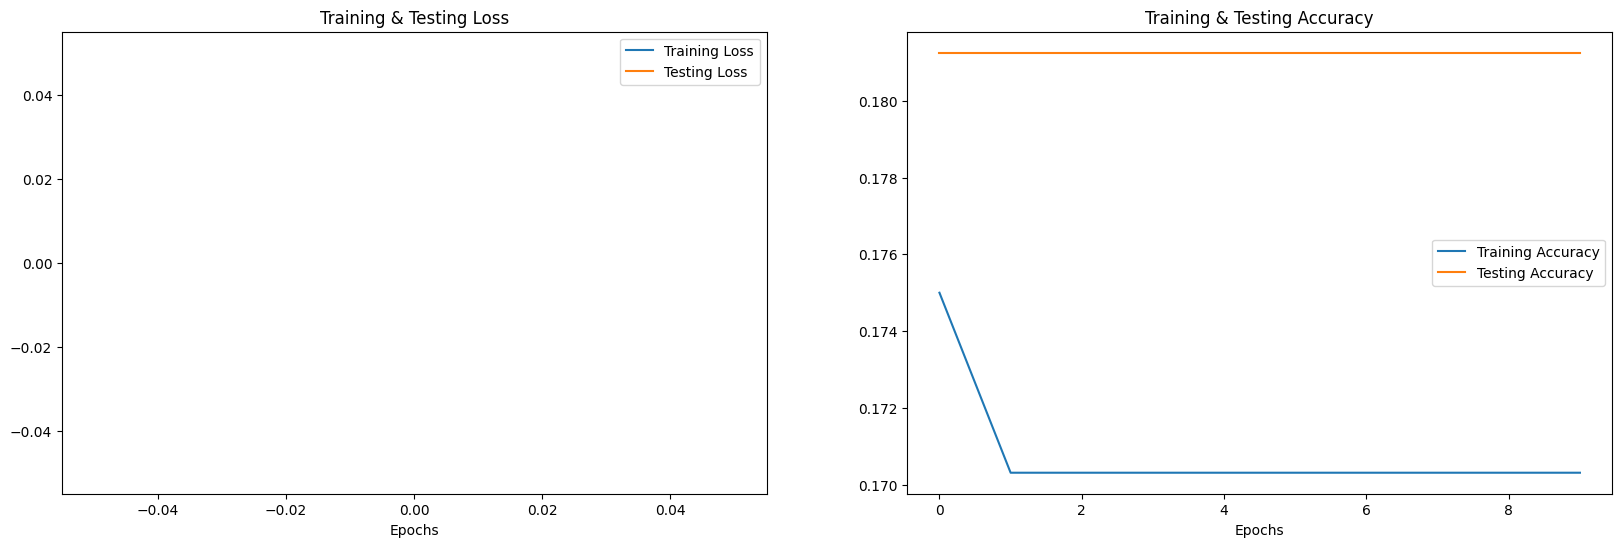

In [128]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history2.history['accuracy']
train_loss = history2.history['loss']
test_acc = history2.history['val_accuracy']
test_loss = history2.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


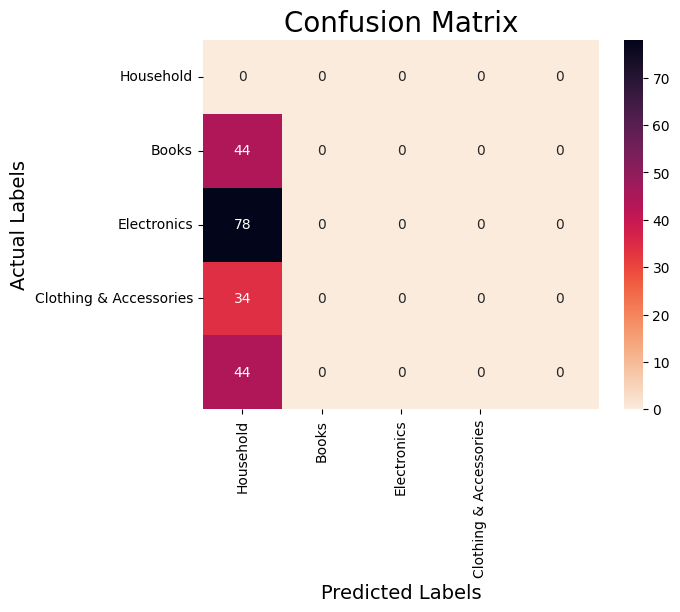

In [129]:
y_pred = model2.predict(X_test)
matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Household', 'Books', 'Electronics', 'Clothing & Accessories'], yticklabels = ['Household', 'Books', 'Electronics', 'Clothing & Accessories'])
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [130]:
print(classification_report(y_test, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      44.0
           2       0.00      0.00      0.00      78.0
           3       0.00      0.00      0.00      34.0
           4       0.00      0.00      0.00      44.0

    accuracy                           0.00     200.0
   macro avg       0.00      0.00      0.00     200.0
weighted avg       0.00      0.00      0.00     200.0



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.